# Problem Statement

Our telecommunications firm is experiencing a significant annual customer churn rate of 15-25%. This loss of profitable customers negatively impacts our revenue and market competitiveness. We aim to significantly reduce churn, particularly among our most valuable customers.

By leveraging customer-level data and advanced analytics, we will develop predictive models to identify customers at high risk of churn. This proactive approach will enable us to implement targeted retention strategies, minimizing customer acquisition costs and bolstering our long-term success.

# Business Objectives 

Predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

## Import libraries  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

## Data Understanding and Exploration 

In [2]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df.shape

(99999, 226)

In [4]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
df_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


## Handle missing values 

In [7]:
missing_cols = (round((df.isnull().sum()/df.shape[0])*100,2).to_frame('null').sort_values('null', ascending=False))
missing_cols

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


In [8]:
missing_cols_30 = list(missing_cols.index[missing_cols['null'] > 30])
missing_cols_30

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

In [9]:
df = df.drop(missing_cols_30, axis=1)

In [10]:
df = df.drop('circle_id', axis=1)

In [11]:
date_cols = [k for k in df.columns.to_list() if 'date' in k]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [12]:
df = df.drop(date_cols, axis=1)

In [13]:
df.shape

(99999, 177)

In [14]:
missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
missing_rows_50.shape

(1018, 177)

In [15]:
df = df.drop(missing_rows_50.index)
df.shape

(98981, 177)

In [16]:
missing_cols = (round((df.isnull().sum()/df.shape[0])*100,2).to_frame('null').sort_values('null', ascending=False))
missing_cols

,null
std_og_t2t_mou_9,6.80
loc_og_t2m_mou_9,6.80
roam_og_mou_9,6.80
isd_og_mou_9,6.80
std_ic_t2f_mou_9,6.80
loc_og_t2t_mou_9,6.80
std_og_mou_9,6.80
std_og_t2c_mou_9,6.80
std_ic_mou_9,6.80
roam_ic_mou_9,6.80


Minutes of Usage (MOU) data for all call types in months are consistently missing across all columns for certain records. We need to check these records where MOU values for months are absent across all call types.

In [17]:
mou_9 = (((missing_cols[missing_cols['null'] == 6.8]).index).to_list())
mou_9

['std_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'roam_og_mou_9',
 'isd_og_mou_9',
 'std_ic_t2f_mou_9',
 'loc_og_t2t_mou_9',
 'std_og_mou_9',
 'std_og_t2c_mou_9',
 'std_ic_mou_9',
 'roam_ic_mou_9',
 'std_og_t2f_mou_9',
 'loc_og_t2f_mou_9',
 'std_og_t2m_mou_9',
 'loc_og_t2c_mou_9',
 'std_ic_t2o_mou_9',
 'loc_ic_mou_9',
 'spl_og_mou_9',
 'loc_og_mou_9',
 'std_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'og_others_9',
 'ic_others_9',
 'loc_ic_t2f_mou_9',
 'offnet_mou_9',
 'std_ic_t2m_mou_9',
 'onnet_mou_9',
 'loc_ic_t2t_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9']

In [18]:
null_mou_9 = df[df[mou_9].isnull().all(axis=1)]

In [19]:
null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.1,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.0,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.00,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.00,0.0,NaN,2.06,14.

In [20]:
null_mou_9.shape

(6727, 177)

In [21]:
df = df.drop(null_mou_9.index)

In [22]:
missing_cols = (round((df.isnull().sum()/df.shape[0])*100,2).to_frame('null').sort_values('null', ascending=False))
missing_cols

,null
loc_ic_t2f_mou_6,2.60
roam_og_mou_6,2.60
std_og_t2m_mou_6,2.60
loc_og_t2t_mou_6,2.60
loc_ic_t2m_mou_6,2.60
loc_og_t2m_mou_6,2.60
loc_ic_t2t_mou_6,2.60
loc_og_t2f_mou_6,2.60
og_others_6,2.60
spl_og_mou_6,2.60


In [23]:
mou_6 = (((missing_cols[missing_cols['null'] == 2.6]).index).to_list())
mou_6

['loc_ic_t2f_mou_6',
 'roam_og_mou_6',
 'std_og_t2m_mou_6',
 'loc_og_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_og_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_og_t2f_mou_6',
 'og_others_6',
 'spl_og_mou_6',
 'loc_og_t2c_mou_6',
 'isd_og_mou_6',
 'std_og_mou_6',
 'loc_og_mou_6',
 'std_og_t2c_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2f_mou_6',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_6',
 'std_ic_mou_6',
 'onnet_mou_6',
 'ic_others_6',
 'roam_ic_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'isd_ic_mou_6',
 'offnet_mou_6',
 'std_ic_t2m_mou_6',
 'spl_ic_mou_6']

In [24]:
null_mou_6 = df[df[mou_6].isnull().all(axis=1)]
null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
15,7002070365,0.0,0.0,0.0,31.00,510.465,590.643,510.390,NaN,246.56,280.31,289.79,NaN,839.58,1011.91,642.14,NaN,0.0,0.0,0.00,NaN,0.88,0.0,0.00,NaN,16.13,44.79,48.33,NaN,38.99,92.53,158.11,NaN,5.13,4.83,8.43,NaN,9.78,0.0,0.03,NaN,60.26,142.16,214.88,NaN,230.43,235.51,241.46,NaN,775.66,914.54,475.56,NaN,0.0,0.0,0.00,NaN,0.0,0.0,0.0,NaN,1006.09,1150.06,717.03,NaN,0.0,0.0,0.0,NaN,18.89,0.00,0.03,NaN,0.0,0.0,0.0,0.0,1085.26,1292.23,931.94,NaN,16.91,16.19,14.91,NaN,36.94,45.76,50.01,NaN,7.24,9.51,15.54,NaN,61.11,71.48,80.48,NaN,1.76,2.68,30.16,NaN,40.06,14.31,82.46,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,41.83,16.99,112.63,0.0,105.86,89.71,198.28,NaN,0.00,0.61,1.01,NaN,0.0,0.0,0.0,NaN,2.91,0.61,4.14,1,13,11,8,0,686,696,556,0,110,130,130,0,110,130,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,0.0,0.0,0.0,0.0
26,7000335166,0.0,0.0,0.0,0.01,130.414,22.088,133.878,NaN,0.00,0.00,0.00,NaN,1.10,1.45,5.89,NaN,0.0,0.0,0.00,NaN,0.00,0.0,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.0,3.41,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.00,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,1.10,1.45,5.89,NaN,0.0,0.0,0.0,0.0,1.10,1.45,5.89,NaN,0.00,0.00,0.00,NaN,4.55,8.76,4.90,NaN,0.00,0.00,0.00,NaN,4.55,8.76,4.90,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.0,4.55,8.93,5.16,NaN,0.00,0.16,0.26,NaN,0.0,0.0,0

In [25]:
df = df.drop(null_mou_6.index)

In [26]:
missing_cols = (round((df.isnull().sum()/df.shape[0])*100,2).to_frame('null').sort_values('null', ascending=False))
missing_cols

,null
std_og_t2t_mou_8,0.95
isd_ic_mou_8,0.95
loc_og_t2f_mou_8,0.95
loc_og_t2m_mou_8,0.95
og_others_8,0.95
isd_og_mou_8,0.95
loc_ic_t2t_mou_8,0.95
loc_og_t2t_mou_8,0.95
ic_others_8,0.95
std_og_mou_8,0.95


In [27]:
mou_8 = (((missing_cols[missing_cols['null'] == 0.95]).index).to_list())
mou_8

['std_og_t2t_mou_8',
 'isd_ic_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'og_others_8',
 'isd_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_og_t2t_mou_8',
 'ic_others_8',
 'std_og_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_og_t2c_mou_8',
 'loc_ic_t2f_mou_8',
 'roam_ic_mou_8',
 'spl_og_mou_8',
 'std_og_t2m_mou_8',
 'offnet_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'std_ic_t2t_mou_8',
 'onnet_mou_8',
 'spl_ic_mou_8',
 'std_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_t2f_mou_8']

In [28]:
null_mou_8 = df[df[mou_8].isnull().all(axis=1)]
null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
138,7000689197,0.0,0.0,0.0,120.948,0.000,0.0,85.399,43.08,0.00,NaN,7.81,36.14,0.55,NaN,31.39,0.00,0.00,NaN,12.89,0.00,0.00,NaN,27.83,21.51,0.0,NaN,0.96,35.58,0.55,NaN,10.41,0.56,0.0,NaN,0.0,0.00,0.0,NaN,0.00,57.66,0.55,NaN,11.38,21.56,0.00,NaN,0.00,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,21.56,0.00,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.58,NaN,0.00,0.0,0.0,NaN,0.0,79.23,1.13,0.0,11.38,29.31,0.0,NaN,2.71,91.14,0.0,NaN,5.16,0.00,0.0,NaN,0.0,120.46,0.0,NaN,7.88,17.34,0.00,NaN,1.66,18.26,0.0,NaN,0.00,2.73,0.0,NaN,0.0,0.0,0.0,NaN,0.0,38.34,0.00,NaN,1.66,158.81,0.00,0.0,9.54,0.0,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,5,1,1,2,140,0,0,100,50,0,0,50,30,0,0,50,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,617,0.0,0.00,0.00,0.0
239,7000781848,0.0,0.0,0.0,236.093,0.170,0.0,210.384,29.03,0.00,NaN,137.41,476.28,0.28,NaN,129.38,2.08,0.00,NaN,0.00,11.14,0.28,NaN,0.00,4.28,0.0,NaN,5.34,3.99,0.00,NaN,33.81,0.00,0.0,NaN,0.0,0.00,0.0,NaN,0.00,8.28,0.00,NaN,39.16,24.74,0.00,NaN,132.06,461.13,0.0,NaN,93.16,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,485.88,0.00,NaN,225.23,0.0,0.0,NaN,0.0,0.00,0.00,NaN,2.40,0.0,0.0,NaN,0.0,494.16,0.00,0.0,266.79,0.21,0.0,NaN,23.79,10.73,0.0,NaN,27.84,0.00,0.0,NaN,0.0,10.95,0.0,NaN,51.64,0.00,0.00,NaN,7.38,33.79,0.0,NaN,8.86,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,33.79,0.00,NaN,16.24,44.74,0.00,0.0,67.89,0.0,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,3,5,1,5,220,0,0,240,110,0,0,130,0

In [29]:
df = df.drop(null_mou_8.index)

In [30]:
missing_cols = (round((df.isnull().sum()/df.shape[0])*100,2).to_frame('null').sort_values('null', ascending=False))
missing_cols

,null
std_og_t2m_mou_7,0.75
loc_og_t2t_mou_7,0.75
loc_og_t2f_mou_7,0.75
loc_og_t2c_mou_7,0.75
loc_og_mou_7,0.75
std_og_t2t_mou_7,0.75
std_og_t2f_mou_7,0.75
std_og_t2c_mou_7,0.75
std_og_mou_7,0.75
ic_others_7,0.75


In [31]:
mou_7 = (((missing_cols[missing_cols['null'] == 0.75]).index).to_list())
mou_7

['std_og_t2m_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'ic_others_7',
 'isd_og_mou_7',
 'isd_ic_mou_7',
 'spl_og_mou_7',
 'spl_ic_mou_7',
 'og_others_7',
 'loc_ic_t2t_mou_7',
 'std_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'std_ic_t2o_mou_7',
 'loc_ic_t2f_mou_7',
 'std_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'std_ic_t2m_mou_7',
 'onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7']

In [32]:
null_mou_7 = df[df[mou_7].isnull().all(axis=1)]
null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
10,7000471350,0.0,0.0,0.0,0.400,0.00,281.858,82.638,0.0,NaN,0.55,0.00,0.13,NaN,189.99,76.58,0.00,NaN,0.00,0.00,0.0,NaN,0.00,0.00,0.0,NaN,0.00,0.00,0.13,NaN,10.98,0.31,0.0,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.13,NaN,10.98,0.31,0.0,NaN,0.55,0.00,0.0,NaN,179.01,76.26,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,179.56,76.26,0.0,NaN,0.00,0.00,0.00,NaN,0.01,0.00,0.00,NaN,0.0,0.0,0.13,0.0,190.56,76.58,0.00,NaN,0.00,0.00,26.35,NaN,6.04,1.83,0.0,NaN,0.00,0.00,26.35,NaN,6.04,1.83,0.0,NaN,2.33,0.00,0.0,NaN,41.78,7.59,0.00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.00,NaN,44.11,7.59,26.35,0.0,50.18,10.43,0.0,NaN,0.01,1.00,0.00,NaN,0.00,0.00,0.0,NaN,0.0,0.0,1,1,17,7,0,0,324,99,0,0,30,30,0,0,20,30,0.0,0.0,508.14,241.27,0.0,0.0,0.00,0.00,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,414,0.00,0.0,0.0,0.0
180,7000786456,0.0,0.0,0.0,9.194,0.28,234.223,85.617,0.0,NaN,0.00,0.00,9.11,NaN,9.48,35.59,0.00,NaN,17.44,25.96,0.0,NaN,9.48,35.84,0.0,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.0,NaN,0.00,0.00,9.11,NaN,0.00,19.44,0.00,NaN,0.00,0.00,0.0,NaN,0.00,0.00,0.0,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.0,NaN,0.00,0.00,9.11,NaN,0.00,0.00,0.00,NaN,0.0,0.0,9.11,0.0,0.00,0.00,0.00,NaN,0.00,0.00,1.96,NaN,0.71,0.00,0.0,NaN,0.00,0.00,1.96,NaN,0.71,0.00,0.0,NaN,0.00,0.00,0.0,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.00,NaN,0.00,0.00,1.96,0.0,0.86,0.00,0.0,NaN,0.00,0.00,0.00,NaN,0.15,0.00,0.0,NaN,0.0,0.0,2,2,5,3,10,0,275,100,10,0,155,50,0,0,50,0,0.0,

In [33]:
df = df.drop(null_mou_7.index)

In [34]:
missing_cols = (round((df.isnull().sum()/df.shape[0])*100,2).to_frame('null').sort_values('null', ascending=False))
missing_cols

,null
mobile_number,0.0
loc_ic_t2f_mou_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
total_ic_mou_8,0.0
total_ic_mou_9,0.0
spl_ic_mou_6,0.0


In [35]:
df.shape

(88327, 177)

## Identifying high-value customers

High-value customers who have recharged with an amount more than or equal to the 70th percentile of the average amount in the first two months. Hence, we'll create a new column called `avg_rech_amt_6_7` to calculate the average of summing up total recharge amount of month 6 and 7.

In [36]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [37]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

383.0

In [38]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.0,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.0,2.83,0.00,0.0,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.00,0.0,0.00,0.00,315.91,215.64,205.93,233.04,7.89,2.58,3.23,4.46,22.99,64.51,18.29,13.79,0.0,0.00,0.0,4.43,0.0,0.0,0.0,0.0,30.89,67.09,21.53,22.69,0.0,0.0,0.0,0.0,0.00,3.26,5.91,0.00,0.00,0.0,0.0,0.0,346.81,286.01,233.38,255.74,41.33,71.44,28.89,50.23,226.81,149.69,150.16,172.86,8.71,8.68,32.71,65.21,276.86,229.83,2

In [39]:
df.shape

(26511, 178)

After filtering high-value customers, we observe a reduction in the number of rows by approximately 73K, decreasing from 99K to 26K.

## Tag churners

We'll define the churned customers (churn=1, else 0) based on `total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9` attributes.

In [40]:
def is_churn(row):
    return 1 if all(row[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']] == 0) else 0

df['churn'] = df.apply(is_churn, axis=1)

In [41]:
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.0,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.0,2.83,0.00,0.0,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.00,0.0,0.00,0.00,315.91,215.64,205.93,233.04,7.89,2.58,3.23,4.46,22.99,64.51,18.29,13.79,0.0,0.00,0.0,4.43,0.0,0.0,0.0,0.0,30.89,67.09,21.53,22.69,0.0,0.0,0.0,0.0,0.00,3.26,5.91,0.00,0.00,0.0,0.0,0.0,346.81,286.01,233.38,255.74,41.33,71.44,28.89,50.23,226.81,149.69,150.16,172.86,8.71,8.68,32.71,65.21,276.86,

## Data Cleaning

Since this variable churn is the target variable, all the columns relating to this variable (i.e. all columns with suffix _9) can be dropped forn the dataset.

In [42]:
churn_9 = [col for col in df.columns if col.endswith('_9')]
churn_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [43]:
df = df.drop(churn_9, axis=1)

In [44]:
df = df.drop('sep_vbc_3g', axis=1)

churn
0    96.62
1     3.38
Name: count, dtype: float64


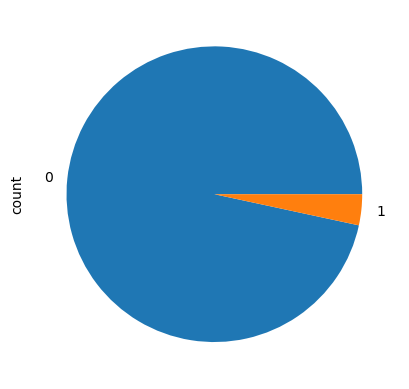

In [45]:
churn_percentage = round((df['churn'].value_counts() / len(df)) * 100,2)
print(churn_percentage)

churn_percentage.plot(kind="pie")
plt.show()

As we can see that 96% of the customers do not churn, there is posibility of class imbalance. We'll handle it later in the imbalance processing phase.

## Outliers treatment 

In [46]:
df.dtypes

mobile_number           int64
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou

In [47]:
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [48]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)

In [49]:
for col in numeric_cols:
    q1 = df[col].quantile(0.1)
    q3 = df[col].quantile(0.9)
    iqr = q3-q1
    range_low = q1-1.5*iqr
    range_high = q3+1.5*iqr
    filtered_df = df.loc[(df[col] > range_low) & (df[col] < range_high)]
    
filtered_df.shape

(26234, 136)

In [50]:
df.shape

(26511, 136)

## Derive new features 

#### Derive new column `arpu_action_dec_flag` 

In [51]:
filtered_df['avg_arpu_action'] = (filtered_df['arpu_7'] + filtered_df['arpu_8'])/2

In [52]:
filtered_df['diff_arpu'] = filtered_df['avg_arpu_action'] - filtered_df['arpu_6']

In [53]:
filtered_df['arpu_action_dec_flag'] = np.where(filtered_df['diff_arpu']<0, 1, 0)

In [54]:
filtered_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_arpu_action,diff_arpu,arpu_action_dec_flag
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,314.7925,-63.9285,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.0,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.00,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.0,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.0,0.0,0.0,0.0,0.00,0.23,0.0,0.0,0.0,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.0,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1148.46,0.81,0.00,0.0,0.0,0.0,2.58,0.00,0.00,0.93,0.0,0.0,1249.53,0.81,0.00,34.54,0.00,0.00,47.41,2.31,0.00,0.00,0.00,0.00,81.96,2.31,0.00,8.63,0.00,0.00,1.28,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,9.91,0.00,0.00,91.88,2.31,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,19,2,4,816,0,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,

#### Derive new column `mou_action_dec_flag`

In [55]:
total_mou = [total for total in filtered_df.columns if 'total' in total]
total_mou

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [56]:
filtered_df['total_mou_good'] = (filtered_df['total_og_mou_6'] + filtered_df['total_ic_mou_6'])

In [57]:
filtered_df['avg_mou_action'] = (filtered_df['total_og_mou_7'] + filtered_df['total_og_mou_8'] + filtered_df['total_ic_mou_7'] + filtered_df['total_ic_mou_8'])/2

In [58]:
filtered_df['diff_mou'] = filtered_df['avg_mou_action'] - filtered_df['total_mou_good']

In [59]:
filtered_df['mou_action_dec_flag'] = np.where((filtered_df['diff_mou'] < 0), 1, 0)

In [60]:
filtered_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_arpu_action,diff_arpu,arpu_action_dec_flag,total_mou_good,avg_mou_action,diff_mou,mou_action_dec_flag
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,314.7925,-63.9285,1,612.22,324.125,-288.095,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.0,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.00,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.0,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.0,0.0,0.0,0.0,0.00,0.23,0.0,0.0,0.0,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,243.8815,-187.0935,1,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.0,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1148.46,0.81,0.00,0.0,0.0,0.0,2.58,0.00,0.00,0.93,0.0,0.0,1249.53,0.81,0.00,34.54,0.00,0.00,47.41,2.31,0.00,0.00,0.00,0.00,81.96,2.31,0.00,8.63,0.00,0.00,1.28,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,9.91,0.00,0.00,91.88,2.31,0.00,0.0,

#### Derive new column `rech_num_action_dec_flag`

In [61]:
filtered_df['avg_rech_num_action'] = (filtered_df['total_rech_num_7'] + filtered_df['total_rech_num_8'])/2

In [62]:
filtered_df['diff_rech_num'] = filtered_df['avg_rech_num_action'] - filtered_df['total_rech_num_6']

In [63]:
filtered_df['rech_num_action_dec_flag'] = np.where((filtered_df['diff_rech_num'] < 0), 1, 0)

In [64]:
filtered_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_arpu_action,diff_arpu,arpu_action_dec_flag,total_mou_good,avg_mou_action,diff_mou,mou_action_dec_flag,avg_rech_num_action,diff_rech_num,rech_num_action_dec_flag
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,314.7925,-63.9285,1,612.22,324.125,-288.095,1,17.5,-1.5,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.0,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.00,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.0,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.0,0.0,0.0,0.0,0.00,0.23,0.0,0.0,0.0,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,243.8815,-187.0935,1,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.0,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1148.46,0.81,0.00,0.0,0.0,0.0,2.58,0.00,0.00,0.93,0.0,0.0,1249.53,0.81,0.00,34.54,0.00,0.00,47.41,2.31,0.00,0.00,0.00,0.00,81.96,2.31,0.00,8.63,0.00,

#### Derive new column `rech_amt_action_dec_flag` 

In [65]:
filtered_df['avg_rech_amt_action'] = (filtered_df['total_rech_amt_7'] + filtered_df['total_rech_amt_8'])/2

In [66]:
filtered_df['diff_rech_amt'] = filtered_df['avg_rech_amt_action'] - filtered_df['total_rech_amt_6']

In [67]:
filtered_df['rech_amt_action_dec_flag'] = np.where((filtered_df['diff_rech_amt'] < 0), 1, 0) 

In [68]:
filtered_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_arpu_action,diff_arpu,arpu_action_dec_flag,total_mou_good,avg_mou_action,diff_mou,mou_action_dec_flag,avg_rech_num_action,diff_rech_num,rech_num_action_dec_flag,avg_rech_amt_action,diff_rech_amt,rech_amt_action_dec_flag
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,314.7925,-63.9285,1,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.0,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.00,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.0,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.0,0.0,0.0,0.0,0.00,0.23,0.0,0.0,0.0,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,243.8815,-187.0935,1,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.0,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1148.46,0.81,0.00,0.0,0.0,0.0,2.58,0.00,0.00,0.93,0.0,0.0,124

#### Derive new column `vbc_action_dec_flag`

In [69]:
filtered_df['avg_vbc_3g_action'] = (filtered_df['jul_vbc_3g'] + filtered_df['aug_vbc_3g'])/2

In [70]:
filtered_df['diff_vbc'] = filtered_df['avg_vbc_3g_action'] - filtered_df['jun_vbc_3g']

In [71]:
filtered_df['vbc_action_dec_flag'] = np.where(filtered_df['diff_vbc']<0, 1, 0)

In [72]:
filtered_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_arpu_action,diff_arpu,arpu_action_dec_flag,total_mou_good,avg_mou_action,diff_mou,mou_action_dec_flag,avg_rech_num_action,diff_rech_num,rech_num_action_dec_flag,avg_rech_amt_action,diff_rech_amt,rech_amt_action_dec_flag,avg_vbc_3g_action,diff_vbc,vbc_action_dec_flag
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,314.7925,-63.9285,1,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,465.840,343.680,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.0,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.00,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.0,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.0,0.0,0.0,0.0,0.00,0.23,0.0,0.0,0.0,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,243.8815,-187.0935,1,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.0,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.0,0

## EDA 

### Univariate analysis 

In [73]:
filtered_df.dtypes

mobile_number                object
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            

In [74]:
filtered_df['churn'] = filtered_df['churn'].astype('int64')

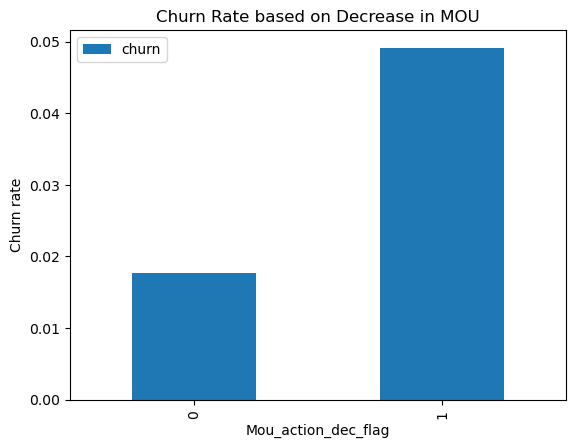

In [75]:
filtered_df.pivot_table(values='churn', index='mou_action_dec_flag', aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.xlabel('Mou_action_dec_flag')
plt.title('Churn Rate based on Decrease in MOU')
plt.show()

The churn rate tends to rise among customers when there's a decrease in their minutes of usage (MOU) during the action phase compared to the good phase.

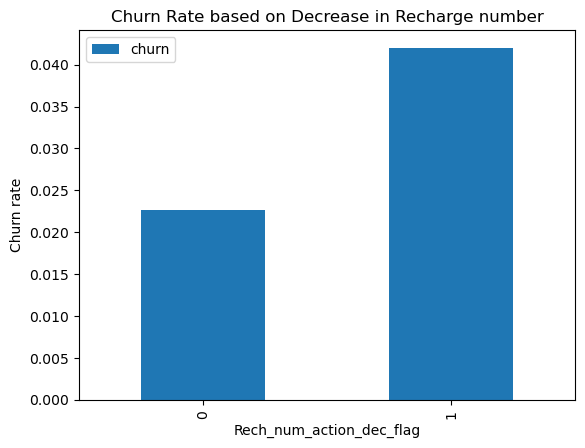

In [76]:
filtered_df.pivot_table(values='churn', index='rech_num_action_dec_flag', aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.xlabel('Rech_num_action_dec_flag')
plt.title('Churn Rate based on Decrease in Recharge number')
plt.show()

The churn rate is higher for customers whose number of recharges during the action phase is lower than the number during the good phase.

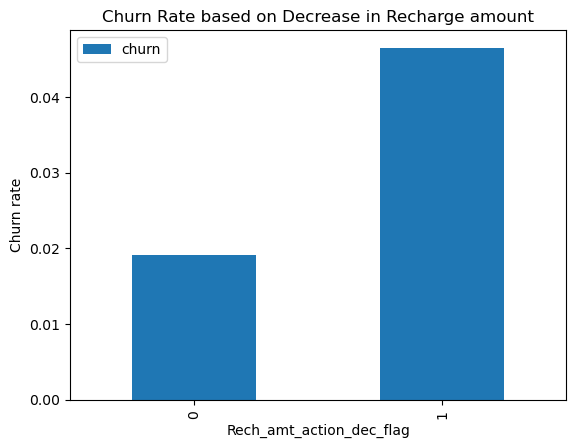

In [77]:
filtered_df.pivot_table(values='churn', index='rech_amt_action_dec_flag', aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.xlabel('Rech_amt_action_dec_flag')
plt.title('Churn Rate based on Decrease in Recharge amount')
plt.show()

Similarly, we notice a consistent trend in churn rate based on the decrease in recharge amount. Customers exhibit higher churn rates when their recharge amount during the action phase is lower than during the good phase.

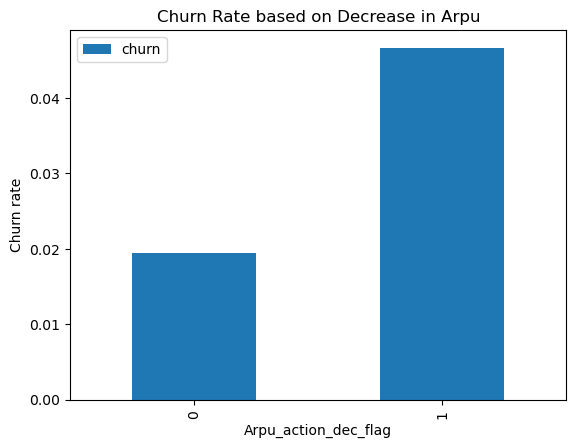

In [78]:
filtered_df.pivot_table(values='churn', index='arpu_action_dec_flag', aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.xlabel('Arpu_action_dec_flag')
plt.title('Churn Rate based on Decrease in Arpu')
plt.show()

As expected, the churn rate is more for the customers, whose average revenue in the action phase is lesser than the number in good phase.

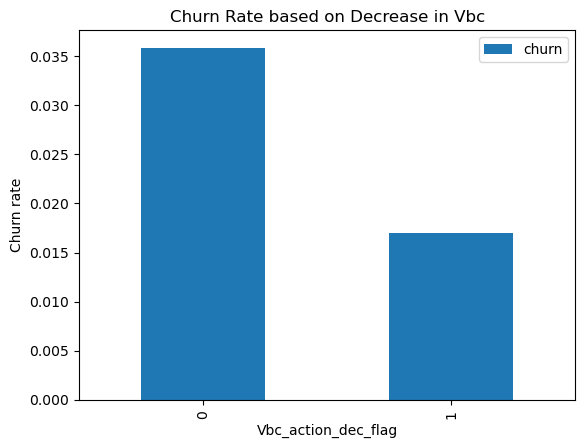

In [79]:
filtered_df.pivot_table(values='churn', index='vbc_action_dec_flag', aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.xlabel('Vbc_action_dec_flag')
plt.title('Churn Rate based on Decrease in Vbc')
plt.show()

A higher churn rate among customers whose volume-based costs increase during the action month. This indicates that customers are less likely to recharge monthly during the action phase.

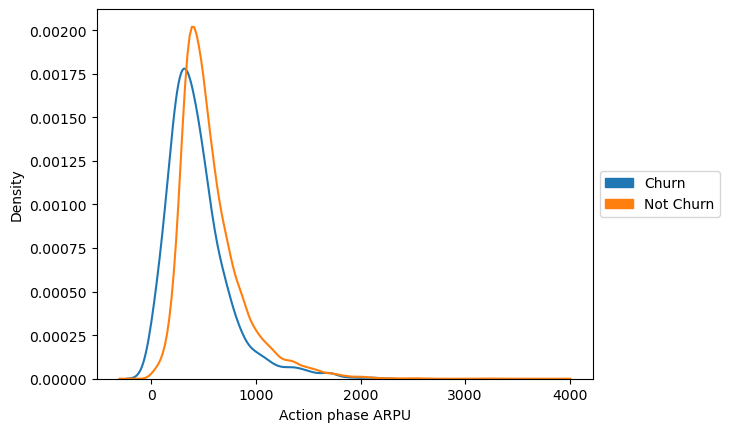

In [80]:
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 1, 'avg_arpu_action'], label='Churn', hist=False)
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 0, 'avg_arpu_action'], label='Not Churn', hist=False)
ax.set(xlabel='Action phase ARPU')

plt.legend()
churn_patch = mpatches.Patch(color=sns.color_palette()[0], label='Churn')
not_churn_patch = mpatches.Patch(color=sns.color_palette()[1], label='Not Churn')
plt.legend(handles=[churn_patch, not_churn_patch], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In the action phase, churned customers typically have an ARPU ranging from 0 to 900. Higher ARPU correlates with lower churn rates.

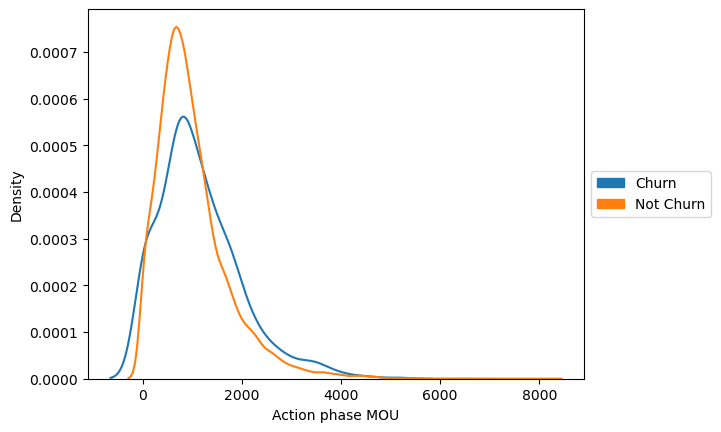

In [81]:
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 1, 'total_mou_good'], label='Churn', hist=False)
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 0, 'total_mou_good'], label='Not Churn', hist=False)
ax.set(xlabel='Action phase MOU')

plt.legend()
churn_patch = mpatches.Patch(color=sns.color_palette()[0], label='Churn')
not_churn_patch = mpatches.Patch(color=sns.color_palette()[1], label='Not Churn')
plt.legend(handles=[churn_patch, not_churn_patch], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Most customers have MOU values concentrated in the range of 0 to 2500. Customers with higher MOU tend to exhibit lower churn rates.

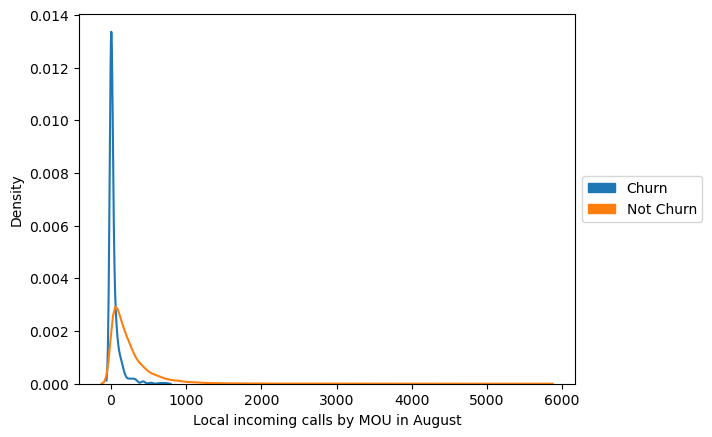

In [82]:
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 1, 'loc_ic_mou_8'], label='Churn', hist=False)
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 0, 'loc_ic_mou_8'], label='Not Churn', hist=False)
ax.set(xlabel='Local incoming calls by MOU in August')

plt.legend()
churn_patch = mpatches.Patch(color=sns.color_palette()[0], label='Churn')
not_churn_patch = mpatches.Patch(color=sns.color_palette()[1], label='Not Churn')
plt.legend(handles=[churn_patch, not_churn_patch], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In August, customers who are more likely to churn tend to use the service for shorter durations (MOU) compared to customers who are less likely to churn.

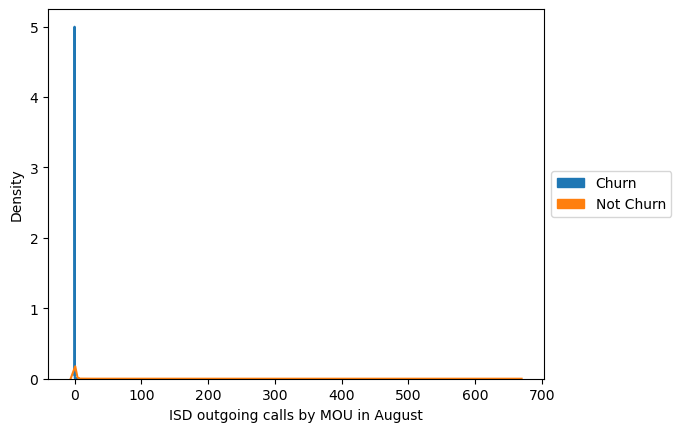

In [83]:
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 1, 'isd_og_mou_8'], label='Churn', hist=False)
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 0, 'isd_og_mou_8'], label='Not Churn', hist=False)
ax.set(xlabel='ISD outgoing calls by MOU in August')

plt.legend()
churn_patch = mpatches.Patch(color=sns.color_palette()[0], label='Churn')
not_churn_patch = mpatches.Patch(color=sns.color_palette()[1], label='Not Churn')
plt.legend(handles=[churn_patch, not_churn_patch], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In August, churned customers (those who cancelled) made very few ISD outgoing calls, while non-churned customers made slightly more.

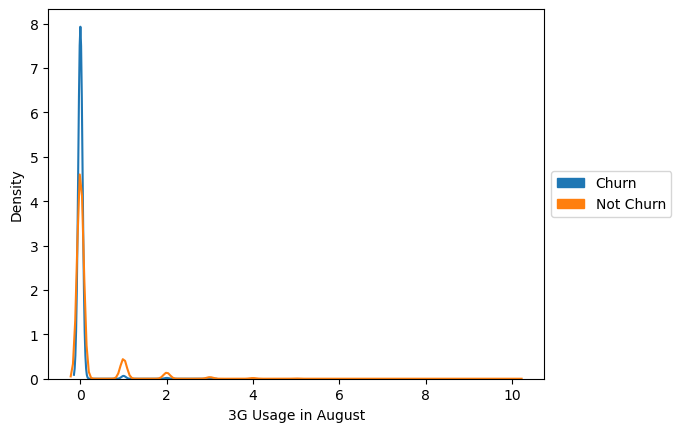

In [84]:
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 1, 'monthly_3g_8'], label='Churn', hist=False)
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 0, 'monthly_3g_8'], label='Not Churn', hist=False)
ax.set(xlabel='3G Usage in August')

plt.legend()
churn_patch = mpatches.Patch(color=sns.color_palette()[0], label='Churn')
not_churn_patch = mpatches.Patch(color=sns.color_palette()[1], label='Not Churn')
plt.legend(handles=[churn_patch, not_churn_patch], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In August, churned customers (those who cancelled) tend to cluster around a low level of 3G data usage, while non-churned customers' usage is more spread out across various amounts.

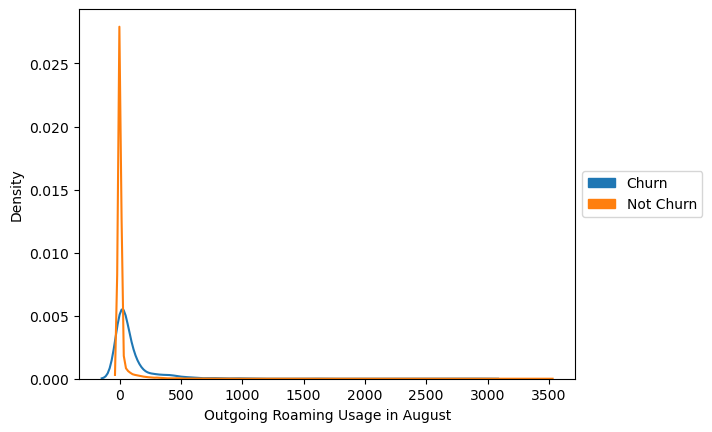

In [85]:
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 1, 'roam_og_mou_8'], label='Churn', hist=False)
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 0, 'roam_og_mou_8'], label='Not Churn', hist=False)
ax.set(xlabel='Outgoing Roaming Usage in August')

plt.legend()
churn_patch = mpatches.Patch(color=sns.color_palette()[0], label='Churn')
not_churn_patch = mpatches.Patch(color=sns.color_palette()[1], label='Not Churn')
plt.legend(handles=[churn_patch, not_churn_patch], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Customers experiencing an increase in their outgoing roaming minutes exhibit a higher likelihood of churn.

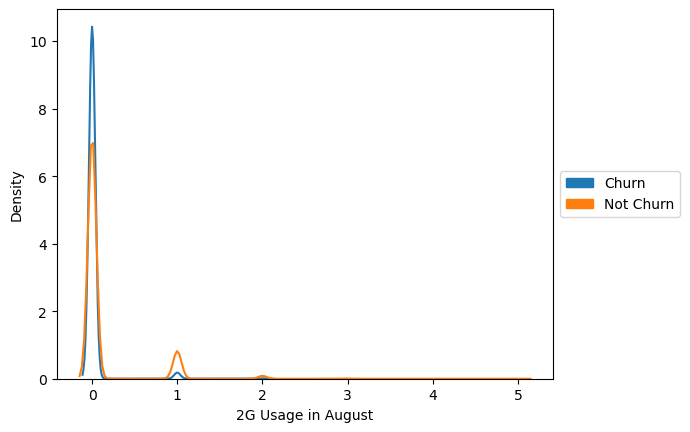

In [86]:
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 1, 'monthly_2g_8'], label='Churn', hist=False)
ax = sns.distplot(filtered_df.loc[filtered_df['churn'] == 0, 'monthly_2g_8'], label='Not Churn', hist=False)
ax.set(xlabel='2G Usage in August')

plt.legend()
churn_patch = mpatches.Patch(color=sns.color_palette()[0], label='Churn')
not_churn_patch = mpatches.Patch(color=sns.color_palette()[1], label='Not Churn')
plt.legend(handles=[churn_patch, not_churn_patch], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Cutomers decreasing monthly 2g usage for August are most probable to churn.

### Bivariate analysis 

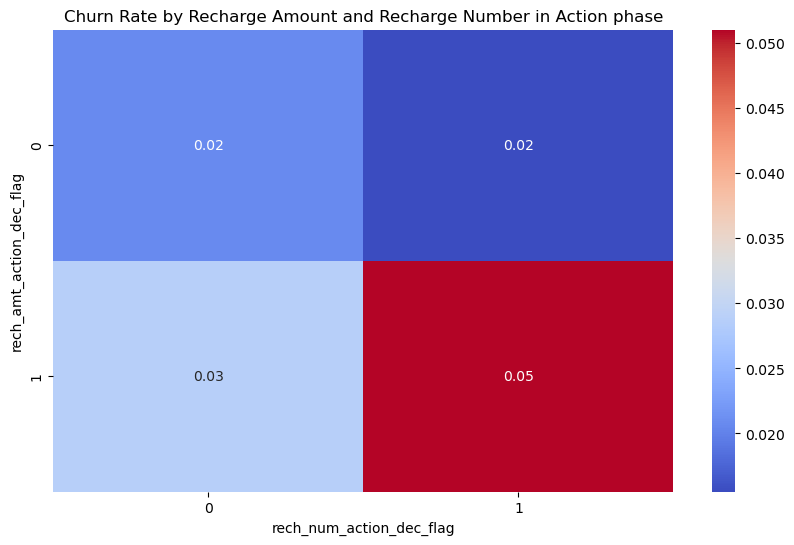

In [87]:
pivot_table = filtered_df.pivot_table(values='churn', index='rech_amt_action_dec_flag', columns='rech_num_action_dec_flag', aggfunc='mean')


plt.figure(figsize=(10, 6))  
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.xlabel('rech_num_action_dec_flag')
plt.ylabel('rech_amt_action_dec_flag')
plt.title('Churn Rate by Recharge Amount and Recharge Number in Action phase')
plt.show()


Customers experiencing decreases in both recharge amount and number of recharges during the action phase are associated with higher churn rates compared to the good phase.

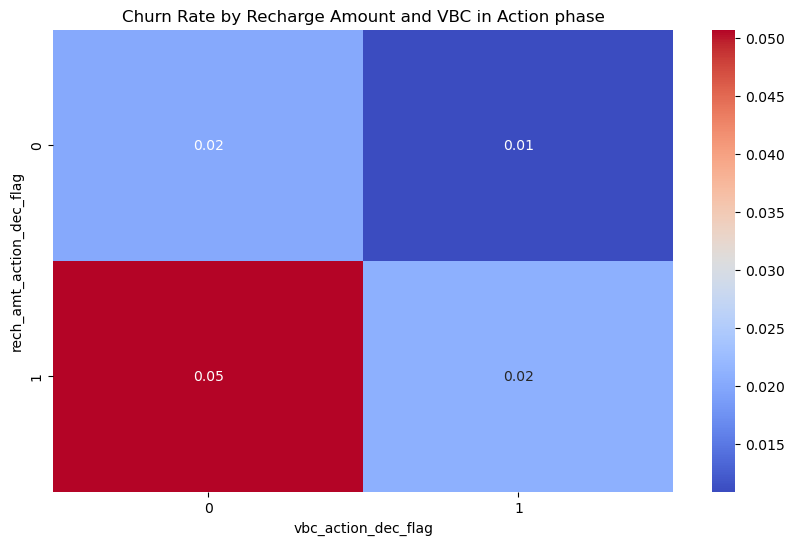

In [88]:
pivot_table = filtered_df.pivot_table(values='churn', index='rech_amt_action_dec_flag', columns='vbc_action_dec_flag', aggfunc='mean')


plt.figure(figsize=(10, 6))  
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.xlabel('vbc_action_dec_flag')
plt.ylabel('rech_amt_action_dec_flag')
plt.title('Churn Rate by Recharge Amount and VBC in Action phase')
plt.show()


We observe that the churn rate is higher for customers experiencing a decrease in recharge amount alongside an increase in volume-based cost during the action month.

<Figure size 1000x600 with 0 Axes>

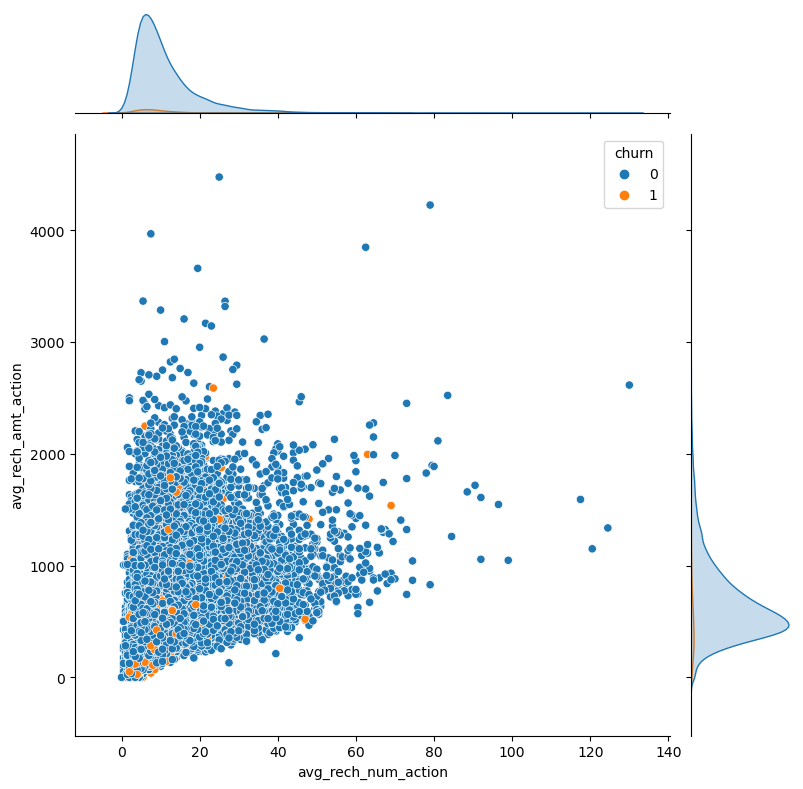

In [89]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.jointplot(x='avg_rech_num_action', y='avg_rech_amt_action', data=filtered_df, hue='churn', height=8)
plt.show()


The relationship between the number of recharges and the amount of recharge is directly proportional. This means that as the number of recharges increases, the amount of recharge also increases, and vice versa.

In [90]:
filtered_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_arpu_action,diff_arpu,arpu_action_dec_flag,total_mou_good,avg_mou_action,diff_mou,mou_action_dec_flag,avg_rech_num_action,diff_rech_num,rech_num_action_dec_flag,avg_rech_amt_action,diff_rech_amt,rech_amt_action_dec_flag,avg_vbc_3g_action,diff_vbc,vbc_action_dec_flag
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,314.7925,-63.9285,1,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,465.840,343.680,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.0,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.00,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.0,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.0,0.0,0.0,0.0,0.00,0.23,0.0,0.0,0.0,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,243.8815,-187.0935,1,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.0,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.0,0

In [91]:
filtered_df = filtered_df.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

In [92]:
filtered_df.shape

(26234, 140)

# Model Building 
 - dividing into train and test sets
 - MinMax scaling for numeric features
 - build multiple predictive models

## Dividing into train and test datasets

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X = filtered_df.drop(['mobile_number', 'churn'], axis=1)

In [95]:
y = filtered_df['churn']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [97]:
X_train.shape, X_test.shape

((20987, 138), (5247, 138))

In [98]:
y_train.shape, y_test.shape

((20987,), (5247,))

## Handling imbalance data 

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train,y_train)

In [101]:
print(X_train.shape)
print(y_train.shape)

(40556, 138)
(40556,)


## Standard scaling for numerical features

In [102]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
numeric_cols = X_train.columns.to_list()

In [105]:
columns_to_remove = ['mou_action_dec_flag', 'rech_num_action_dec_flag', 'rech_amt_action_dec_flag', 'arpu_action_dec_flag', 'vbc_action_dec_flag']
[numeric_cols.remove(col) for col in columns_to_remove]

[None, None, None, None, None]

In [106]:
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

In [107]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_action_dec_flag,mou_action_dec_flag,rech_num_action_dec_flag,rech_amt_action_dec_flag,vbc_action_dec_flag
0,0.0,0.0,0.0,-0.278992,-0.751070,-0.063593,-0.564167,-0.285392,0.248466,0.946276,0.179183,0.549177,-0.270827,-0.270480,-0.320563,-0.306631,-0.372435,-0.406563,-0.319321,-0.323205,-0.028085,-0.305046,-0.356574,-0.470144,-0.036556,-0.215861,-0.171807,-0.193330,-0.261374,-0.241220,-0.392595,-0.440765,-0.328765,-0.421442,-0.118955,0.350239,1.209956,0.430362,0.994132,-0.140478,-0.130612,-0.120939,0.0,0.0,0.0,0.538355,0.215709,0.884788,-0.080039,-0.089503,-0.060677,-0.249451,-0.378111,-0.295372,-0.333448,-0.0157,-0.012637,0.335788,-0.003432,0.613068,-0.404531,-0.367047,-0.197302,0.228065,-0.241986,-0.500265,-0.064320,-0.240650,-0.152701,-0.047830,-0.388890,-0.463014,-0.211573,-0.192977,-0.185650,0.541269,1.228053,0.867070,-0.129266,-0.127916,-0.10227,0.0,0.0,0.0,0.182360,0.678058,0.541573,0.037736,-0.053226,-0.231309,-0.370511,-0.090352,-0.189641,0.019978,-0.155621,-0.119541,-0.091885,-0.095320,-0.069479,-0.420595,-0.934896,-0.196954,-0.423784,-0.851179,-0.090759,-0.290581,-0.171999,0.175001,0.155912,0.390557,-0.616492,-0.251714,-0.232971,-0.20696,-0.269922,-0.270499,-0.251182,-0.250424,-0.246207,-0.231295,-0.267626,-0.277925,-0.272529,-0.223127,-0.224634,-0.218823,-0.135987,-0.138151,-0.118501,0.187916,-0.263927,-0.269447,-0.263985,1,1,1,1,0
1,0.0,0.0,0.0,-0.450772,0.147222,0.631756,-0.014879,0.755301,1.317715,-0.673923,-0.601375,0.088366,-0.270827,-0.270480,-0.320563,-0.293642,-0.372435,-0.406563,-0.325366,-0.334616,-0.300034,-0.021327,-0.069727,1.023879,-0.061447,0.651532,1.455450,-0.170189,0.402145,-0.241220,-0.214325,-0.223216,0.560300,0.152094,0.966520,1.662103,-0.632115,-0.578564,-0.396309,-0.065957,0.881966,-0.120939,0.0,0.0,0.0,-0.333616,0.293981,0.867098,-0.080039,-0.089503,-0.060677,-0.294811,0.711617,-0.150928,-0.333448,-0.0157,-0.012637,-0.431521,0.198412,1.016080,-0.409679,-0.304470,-0.286248,-0.355784,-0.064623,0.052045,-0.216789,0.198934,0.301105,-0.484136,-0.169704,-0.061102,1.441601,0.208876,-0.050038,-0.332230,-0.

In [108]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_action_dec_flag,mou_action_dec_flag,rech_num_action_dec_flag,rech_amt_action_dec_flag,vbc_action_dec_flag
75244,0.0,0.0,0.0,-0.895006,0.194685,0.479967,-0.726389,-0.560004,-0.469693,-0.378380,0.067977,0.611843,-0.270827,-0.270480,-0.320563,-0.306631,-0.372435,-0.406563,-0.210610,0.109436,-0.091526,0.539147,1.787995,2.303188,0.781754,0.042248,-0.057019,-0.193330,-0.261374,-0.24122,0.262438,1.185551,1.428248,-0.635836,-0.593940,-0.417157,-0.583990,-0.589841,-0.403974,0.039002,-0.130612,0.221768,0.0,0.0,0.0,-0.880371,-0.837934,-0.543267,-0.080039,-0.089503,-0.060677,-0.345009,-0.378111,-0.295372,-0.333448,-0.0157,1.795323,-0.747006,-0.279176,0.187194,0.725277,0.995037,0.554498,6.240427,9.113065,6.069654,0.056289,-0.183662,0.656937,4.770779,6.747626,4.582844,0.040844,-0.195159,0.456051,-0.278467,-0.324950,0.134040,-0.012749,0.090679,0.087348,0.0,0.0,0.0,-0.148797,-0.324211,0.338644,4.058471,5.428145,4.080834,-0.370511,-0.090352,-0.189641,0.613058,-0.155621,0.385126,-0.091885,-0.09532,-0.069479,-0.643635,-0.817921,-0.320743,-1.069183,0.146203,0.989652,0.375787,1.397139,1.674414,0.155912,-0.828409,1.591051,0.217694,0.135327,0.048255,0.136467,0.522394,0.270660,3.213491,3.137451,-0.231295,-0.267626,-0.277925,-0.272529,-0.223127,-0.224634,2.214572,-0.135987,-0.138151,-0.118501,1.830360,0.654228,0.994310,0.735861,0,0,1,0,0
17521,0.0,0.0,0.0,-0.051286,-0.586497,-0.571977,-0.727769,-0.719976,-0.524977,-0.508153,-0.504366,-0.399039,-0.270827,-0.270480,-0.320563,-0.306631,-0.372435,-0.406563,-0.199508,-0.290159,-0.213614,0.389808,0.360463,0.114857,-0.267425,-0.264256,-0.242246,-0.193330,-0.261374,-0.24122,0.116490,0.024233,-0.064609,-0.637907,-0.593940,-0.422047,-0.633202,-0.589841,-0.428402,-0.140478,-0.130612,-0.120939,0.0,0.0,0.0,-0.919234,-0.837934,-0.567978,-0.080039,-0.089503,-0.060677,0.012424,-0.378111,0.138559,-0.333448,-0.0157,-0.012637,-0.842244,-0.799199,-0.525278,-0.182525,-0.346735,-0.235974,-0.168941,-0.424721,-0.318211,-0.254337,-0.254562,-0.259090,-0.245429,-0.506290,-0.368523,-0.214912,-0.195159,-0.196656,-0.321984,-0.324950,-0

## Building predictive models 

### Logistic Regression with PCA

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(random_state=42)

In [111]:
pca.fit(X_train)

PCA(random_state=42)

In [112]:
pca.components_

array([[-1.08838864e-19,  2.22044605e-16,  4.44089210e-16, ...,
        -9.34489711e-03, -2.85704129e-02,  1.40450953e-02],
       [ 1.21159218e-19, -8.32667268e-17,  5.55111512e-17, ...,
        -1.17766740e-02, -1.39803833e-02, -1.57971418e-02],
       [-4.65707389e-20, -6.24500451e-17, -2.22044605e-16, ...,
        -3.88465215e-02, -4.78753283e-02,  2.39721707e-02],
       ...,
       [ 0.00000000e+00,  3.09727860e-03, -4.13471349e-02, ...,
        -1.04083409e-17,  1.12757026e-16, -4.05085037e-17],
       [ 9.99999797e-01, -3.88663713e-04,  4.47860226e-04, ...,
        -2.42590236e-18, -1.35525272e-18,  1.34170019e-18],
       [ 0.00000000e+00,  3.41312685e-01, -1.59963884e-01, ...,
        -2.08166817e-17,  9.02056208e-17, -8.15320034e-17]])

In [113]:
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11295171 0.19260592 0.24416506 0.28815134 0.32838717 0.36544494
 0.40190007 0.4324527  0.45791629 0.48295338 0.50599785 0.52793363
 0.54917184 0.56908745 0.58751549 0.60574125 0.62200524 0.63787017
 0.6530576  0.6671251  0.68072028 0.69382557 0.70550332 0.71617298
 0.72652687 0.73637077 0.74591308 0.75536962 0.764742   0.77330912
 0.7813724  0.78907213 0.79664677 0.80389858 0.81108729 0.81774752
 0.82425796 0.8306019  0.83691134 0.84310329 0.84913564 0.85494171
 0.86065169 0.86601594 0.87127921 0.87633815 0.88106239 0.88552997
 0.88987767 0.89391814 0.89788397 0.90163681 0.90527629 0.90886627
 0.91223657 0.91555548 0.91882585 0.92208695 0.92515483 0.92810184
 0.93098096 0.93380981 0.93660951 0.93934896 0.94204911 0.94471387
 0.94728461 0.94978795 0.95218381 0.95453461 0.95683423 0.95907283
 0.9612765  0.96341992 0.96547073 0.96739065 0.96927935 0.97114172
 0.97295118 0.97470369 0.97640081 0.9780557  0.97969487 0.98130627
 0.982894   0.98443466 0.98590508 0.98729176 0.98865872 0.9898

<BarContainer object of 138 artists>

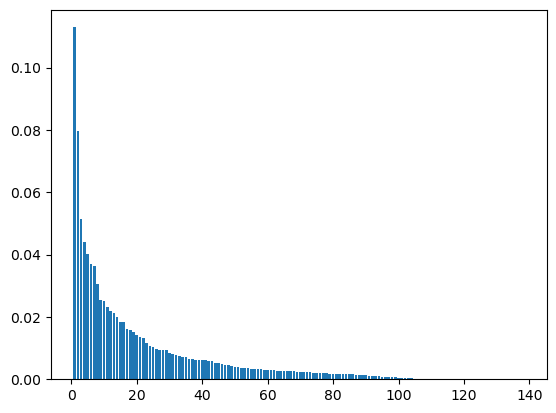

In [114]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative Variance')

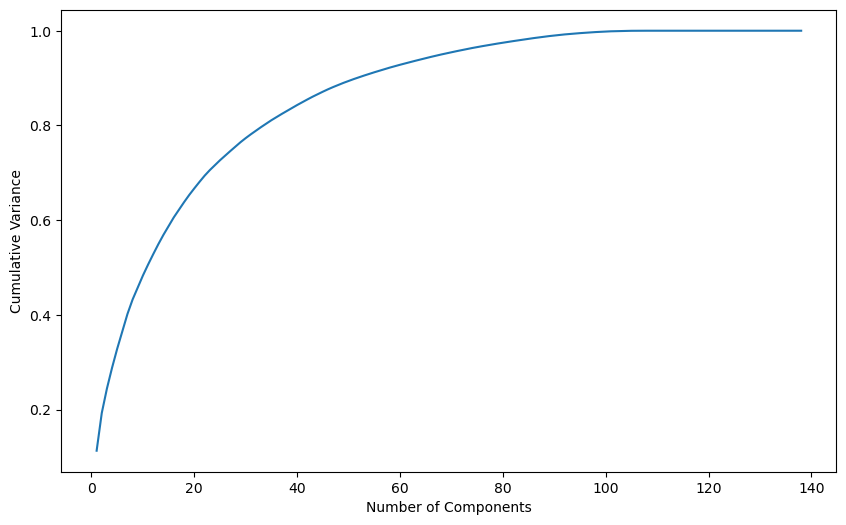

In [115]:
fig = plt.figure(figsize = (10,6))
plt.plot(range(1,len(variance_cumu)+1), variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

More than 80% of the data can be explained with 60 PCA components.

In [116]:
from sklearn.decomposition import IncrementalPCA

In [117]:
pca_60 = IncrementalPCA(n_components=60)

In [118]:
X_train_pca = pca_60.fit_transform(X_train)

In [119]:
X_test_pca = pca_60.transform(X_test)

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [122]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [123]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [124]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.264216,0.065697,0.005065,0.002074,0.01,{'C': 0.01},0.900423,0.906496,0.904974,0.902547,0.905452,0.903978,0.002200,6,0.905602,0.903232,0.904416,0.905459,0.905220,0.904786,0.000879
1,0.501028,0.181131,0.006259,0.005826,0.1,{'C': 0.1},0.902166,0.906742,0.904232,0.903771,0.907417,0.904865,0.001945,1,0.906156,0.904650,0.904909,0.905891,0.905837,0.905489,0.000595
2,0.611208,0.302802,0.005255,0.001794,1,{'C': 1},0.901668,0.905758,0.904727,0.904016,0.907417,0.904717,0.001906,4,0.905971,0.905020,0.905216,0.906015,0.906454,0.905735,0.000535
3,0.485120,0.092763,0.004055,0.001568,10,{'C': 10},0.901917,0.906496,0.904232,0.904261,0.907417,0.904864,0.001930,2,0.906094,0.904959,0.905155,0.906138,0.906640,0.905797,0.000637
4,0.636427,0.224487,0.006639,0.007524,100,{'C': 100},0.901917,0.905758,0.904232,0.904505,0.907417,0.904766,0.001815,3,0.906094,0.904897,0.905340,0.906076,0.906516,0.905785,0.000583
5,0.578850,0.161642,0.004204,0.001938,1000,{'C': 1000},0.901917,0.905758,0.903984,0.904505,0.907417,0.904716,0.001833,5,0.906094,0.904712,0.905278,0.906138,0.906516,0.905748,0.000657


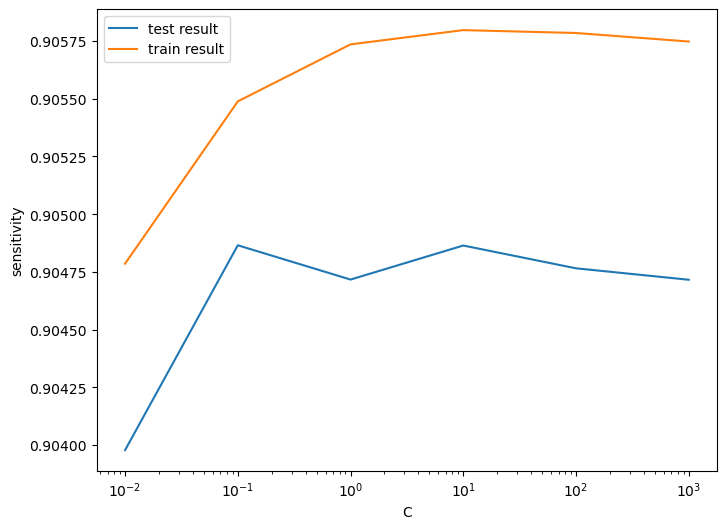

In [125]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

plt.show()


In [126]:
# import mitosheet
# mitosheet.sheet(analysis_to_replay="id-hsdhqldqyf")

In [127]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9048653726129153 at C = 0.1


### Logistic Regression with optimal C 

In [128]:
logistic_pca = LogisticRegression(C=best_C)

In [129]:
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [130]:
y_train_pred = log_pca_model.predict(X_train_pca)

In [131]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16986  3292]
 [ 1912 18366]]


In [132]:
TP = confusion[1,1] 
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0] 

In [133]:
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

print("Sensitivity:",TP / float(TP+FN))

print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8716835979879672
Sensitivity: 0.9057106223493441
Specificity: 0.8376565736265904


In [134]:
y_test_pred = log_pca_model.predict(X_test_pca)

In [135]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4242  834]
 [  38  133]]


In [136]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity:",TP / float(TP+FN))

print("Specificity:", TN / float(TN+FP))

Accuracy: 0.833809796073947
Sensitivity: 0.9057106223493441
Specificity: 0.8376565736265904


**Summary**:


The model demonstrates strong performance across various evaluation metrics on both the train and test sets. With high accuracy, sensitivity, and specificity values, it shows promise for effectively distinguishing between classes and making accurate predictions. 

### Decision Tree with PCA 

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = tree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [139]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.825839,0.025993,0.002469,0.000269,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.821252,0.831319,0.822935,0.821746,0.812377,0.821926,0.006015,5
1,0.803895,0.005471,0.002233,0.000054,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.821252,0.831319,0.822935,0.821746,0.812377,0.821926,0.006015,5
2,0.811461,0.012631,0.002390,0.000186,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.822239,0.829593,0.824168,0.815335,0.814349,0.821137,0.005686,7
3,0.805847,0.009158,0.002289,0.000101,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.822239,0.829593,0.824168,0.815335,0.814349,0.821137,0.005686,7
4,1.401028,0.051166,0.002461,0.000100,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.896450,0.919112,0.893711,0.904093,0.896450,0.901963,0.009247,1
5,1.414909,0.012613,0.002531,0.000143,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.896203,0.919112,0.892478,0.904093,0.896450,0.901667,0.009505,2
6,1.324535,0.007765,0.002428,0.000126,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.854290,0.894205,0.885573,0.890039,0.885602,0.881942,0.014193,3
7,1.317337,0.011872,0.002450,0.000087,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.854290,0.894205,0.884340,0.890039,0.885602,0.881695,0.014138,4


In [140]:
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9019631569859209
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [141]:
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [142]:
y_train_pred = dt_pca_model.predict(X_train_pca)

In [143]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17865  2413]
 [ 1556 18722]]


In [144]:
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

print("Sensitivity:",TP / float(TP+FN))

print("Specificity:", TN / float(TN+FP))

Accuracy: 0.9021353190649966
Sensitivity: 0.9057106223493441
Specificity: 0.8376565736265904


In [145]:
y_test_pred = dt_pca_model.predict(X_test_pca)

In [146]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4393  683]
 [  67  104]]


In [147]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity:",TP / float(TP+FN))

print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8570611778158947
Sensitivity: 0.9057106223493441
Specificity: 0.8376565736265904


**Summary**:


The model with Decision Tree seems to generalize reasonably well from the training to the test dataset, as indicated by the similar performance metrics between the two datasets. 

### Random Forest with PCA 

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [150]:
hyper_params = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

In [151]:
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = hyper_params, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

In [152]:
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [153]:
print('Accuracy:',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy: 0.8389880596084637 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}


In [154]:
rf_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [155]:
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [156]:
y_train_pred = rf_model.predict(X_train_pca)

In [157]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16999  3279]
 [ 2908 17370]]


In [158]:
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

print("Sensitivity:",TP / float(TP+FN))

print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8474455074464937
Sensitivity: 0.9057106223493441
Specificity: 0.8376565736265904


In [159]:
y_test_pred = rf_model.predict(X_test_pca)

In [160]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4251  825]
 [  46  125]]


In [161]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity:",TP / float(TP+FN))

print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8340003811701925
Sensitivity: 0.9057106223493441
Specificity: 0.8376565736265904


**Summary**:


Random Forest model shows good performance with high accuracy, sensitivity, and specificity. It can be said that the model generalizes well to unseen data.

### Logistic Regression without PCA 

In [162]:
import statsmodels.api as sm

In [163]:
logreg = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logreg = logreg.fit()

logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                40556
Model:                            GLM   Df Residuals:                    40426
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 26 Apr 2024   Deviance:                       22536.
Time:                        20:56:53   Pearson chi2:                 8.04e+07
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -31.4707   4177.414     -0.008      0.994   -8219.051    8156.109
loc_og_t2o_mou           -1.742e-06      0.000     -0.008      0.994      -0.000       0.000
std_og_t2o_mou           -1.864e-07   3.54e-05     -0.005      0.996   -6.95e-05    6.92e-05
loc_ic_t2o_mou           -1.376e-07   6.48e-06     -0.021      0.983   -1.28e-05    1.26e-05
arpu_6                       0.1825      0.078      2.342      0.019       0.030       0.335
arpu_7                       0.2271      0.089      2.548      0.011       0.052       0.402
arpu_8                       0.3858      0.110      3.522      0.000       0.171       0.600
onnet_mou_6                 12.4344      3.433      3.622      0.000       5.706      19.162
onnet_mou_7                  1.7012      1.968      0.865      0.387      -2.156       5.558
onnet_mou_8                  5.2726      2.315      2.278      0.023       0.735       9.810
offnet_mou_6                11.6771      3.333      3.503      0.000       5.144      18.210
offnet_mou_7                 3.4850      1.915      1.820      0.069      -0.268       7.238
offnet_mou_8                 3.8527      2.309      1.669      0.095      -0.672       8.378
roam_ic_mou_6                0.0369      0.034      1.080      0.280      -0.030       0.104
roam_ic_mou_7                0.1182      0.051      2.333      0.020       0.019       0.217
roam_ic_mou_8                0.1874      0.048      3.938      0.000       0.094       0.281
roam_og_mou_6               -4.0942      1.105     -3.705      0.000      -6.260      -1.929
roam_og_mou_7               -0.8029      0.571     -1.407      0.159      -1.921       0.315
roam_og_mou_8               -0.9486      0.748     -1.267      0.205      -2.416       0.518
loc_og_t2t_mou_6         -3485.0821    662.394     -5.261      0.000   -4783.350   -2186.814
loc_og_t2t_mou_7          -418.6516    702.849     -0.596      0.551   -1796.211     958.907
loc_og_t2t_mou_8          3131.7259    638.357      4.906      0.000    1880.569    4382.883
loc_og_t2m_mou_6         -3712.8626    705.725     -5.261      0.000   -5096.059   -2329.666
loc_og_t2m_mou_7          -407.5261    682.310     -0.597      0.550   -1744.830     929.777
loc_og_t2m_mou_8          3427.8744    698.655      4.906      0.000    2058.537    4797.212
loc_og_t2f_mou_6          -307.9698     58.512     -5.263      0.000    -422.651    -193.288
loc_og_t2f_mou_7           -35.2725     58.502     -0.603      0.547    -149.933      79.388
loc_og_t2f_mou_8           280.4773     57.240      4.900      0.000     168.289     392.666
loc_og_t2c_mou_6             0.0546      0.024      2.288      0.022       0.008       0.101
loc_og_t2c_mou_7            -0.0251      0.026     -0.970      0.332      -0.076       0.026
loc_og_t2c_mou

There are a large number of features identified in the logistic regression result. To simplify our analysis, we'll use Recursive Feature Elimination (RFE) to reduce this set of features to a smaller, more manageable subset.

#### Feature selection using RFE 

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)

rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [165]:
rfe.ranking_

array([124, 123, 122,   7,  62,  81,  39,  25,  37,   6,  22,   1, 100,
        24,  36,  48, 110,   1,  38,  26,  56, 113,  21,  58,  68,  10,
         1,  86,  98,  60,  82,  55,  57,  84,  23,  54,   4,  35,   1,
        72,  71,  89, 121, 120, 118,  97, 106,   1, 114,  69,   1,  85,
        74,  59, 104,  28,   1,  95,  83,   1, 115,  67,  14, 111,  61,
        13,  53,  16,   1,  90,  15,   1,  41, 103,  29,  94,  99,  73,
        70,  31,  17, 119, 117, 116,  93,  88,  76, 101,  92,  44,  77,
        52,  11,  87,  50,   1, 112,  78,   1, 109,  47,   2,  49,  63,
        65,  64,  66, 108,  75,  19,   8,  42,  79,  91,  45,  34,  43,
        27,   9,   1,  80,  46,  18,  12,  33,   1,  96, 105, 102,  32,
       107,  51,  20,   5,  40,   3,  30,   1])

In [166]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'monthly_2g_8', 'monthly_3g_8', 'vbc_action_dec_flag'],
      dtype='object')

#### Model 1 

In [167]:
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

logreg_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

logreg_1 = logreg_1.fit()

logreg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                40556
Model:                            GLM   Df Residuals:                    40540
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 26 Apr 2024   Deviance:                       29724.
Time:                        20:58:05   Pearson chi2:                 3.26e+11
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -36.0500   3985.278     -0.009      0.993   -7847.052    7774.952
offnet_mou_8           -1.4820      0.147    -10.070      0.000      -1.770      -1.194
roam_og_mou_8           1.1309      0.043     26.469      0.000       1.047       1.215
loc_og_t2f_mou_8       -1.0704      0.090    -11.956      0.000      -1.246      -0.895
std_og_t2m_mou_8        1.3380      0.130     10.263      0.000       1.083       1.594
std_og_mou_8            1.1445      0.148      7.739      0.000       0.855       1.434
isd_og_mou_8           -2.0240      0.449     -4.511      0.000      -2.903      -1.145
og_others_8         -2747.5979   3.15e+05     -0.009      0.993   -6.21e+05    6.15e+05
total_og_mou_8         -1.6331      0.166     -9.863      0.000      -1.958      -1.309
loc_ic_t2f_mou_8       -0.7616      0.076     -9.987      0.000      -0.911      -0.612
loc_ic_mou_8           -1.5471      0.064    -24.151      0.000      -1.673      -1.422
isd_ic_mou_8           -0.7616      0.081     -9.387      0.000      -0.921      -0.603
ic_others_8            -2.0856      0.195    -10.714      0.000      -2.467      -1.704
monthly_2g_8           -1.2288      0.071    -17.340      0.000      -1.368      -1.090
monthly_3g_8           -1.2645      0.056    -22.402      0.000      -1.375      -1.154
vbc_action_dec_flag    -1.3470      0.074    -18.134      0.000      -1.493      -1.201
=======================================================================================
"""

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [169]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_og_mou_8,13.97
0,offnet_mou_8,13.44
4,std_og_mou_8,13.22
3,std_og_t2m_mou_8,12.67
9,loc_ic_mou_8,1.75
1,roam_og_mou_8,1.54
8,loc_ic_t2f_mou_8,1.33
2,loc_og_t2f_mou_8,1.25
14,vbc_action_dec_flag,1.07
13,monthly_3g_8,1.06


In [170]:
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
log_cols

['offnet_mou_8',
 'roam_og_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'monthly_2g_8',
 'monthly_3g_8',
 'vbc_action_dec_flag']

#### Model 2 

In [171]:
X_train_sm_2 = sm.add_constant(X_train[log_cols])

logreg_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

logreg_2 = logreg_2.fit()

logreg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                40556
Model:                            GLM   Df Residuals:                    40541
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14897.
Date:                Fri, 26 Apr 2024   Deviance:                       29794.
Time:                        20:58:06   Pearson chi2:                 3.74e+11
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4788
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3333      0.041    -32.147      0.000      -1.415      -1.252
offnet_mou_8           -1.4882      0.147    -10.095      0.000      -1.777      -1.199
roam_og_mou_8           1.1367      0.043     26.564      0.000       1.053       1.221
loc_og_t2f_mou_8       -1.0671      0.090    -11.920      0.000      -1.243      -0.892
std_og_t2m_mou_8        1.3428      0.131     10.283      0.000       1.087       1.599
std_og_mou_8            1.1505      0.148      7.764      0.000       0.860       1.441
isd_og_mou_8           -2.0180      0.448     -4.503      0.000      -2.896      -1.140
total_og_mou_8         -1.6400      0.166     -9.885      0.000      -1.965      -1.315
loc_ic_t2f_mou_8       -0.7654      0.076    -10.032      0.000      -0.915      -0.616
loc_ic_mou_8           -1.5425      0.064    -24.093      0.000      -1.668      -1.417
isd_ic_mou_8           -0.7574      0.081     -9.347      0.000      -0.916      -0.599
ic_others_8            -2.0924      0.195    -10.734      0.000      -2.475      -1.710
monthly_2g_8           -1.2289      0.071    -17.325      0.000      -1.368      -1.090
monthly_3g_8           -1.2651      0.056    -22.395      0.000      -1.376      -1.154
vbc_action_dec_flag    -1.3498      0.074    -18.199      0.000      -1.495      -1.204
=======================================================================================
"""

In [172]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_8,13.97
0,offnet_mou_8,13.44
4,std_og_mou_8,13.21
3,std_og_t2m_mou_8,12.67
8,loc_ic_mou_8,1.75
1,roam_og_mou_8,1.54
7,loc_ic_t2f_mou_8,1.33
2,loc_og_t2f_mou_8,1.25
13,vbc_action_dec_flag,1.07
12,monthly_3g_8,1.06


In [173]:
log_cols.remove('offnet_mou_8')

#### Model 3

In [174]:
X_train_sm_3 = sm.add_constant(X_train[log_cols])

logreg_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

logreg_3 = logreg_3.fit()

logreg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                40556
Model:                            GLM   Df Residuals:                    40542
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14945.
Date:                Fri, 26 Apr 2024   Deviance:                       29889.
Time:                        20:58:07   Pearson chi2:                 1.04e+09
No. Iterations:                    12   Pseudo R-squ. (CS):             0.4776
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3698      0.042    -32.420      0.000      -1.453      -1.287
roam_og_mou_8           0.8405      0.030     28.393      0.000       0.782       0.899
loc_og_t2f_mou_8       -1.1713      0.090    -13.007      0.000      -1.348      -0.995
std_og_t2m_mou_8        0.0395      0.019      2.072      0.038       0.002       0.077
std_og_mou_8            2.3904      0.109     22.010      0.000       2.178       2.603
isd_og_mou_8           -2.1325      0.465     -4.583      0.000      -3.044      -1.221
total_og_mou_8         -3.0292      0.122    -24.858      0.000      -3.268      -2.790
loc_ic_t2f_mou_8       -0.7564      0.076     -9.946      0.000      -0.905      -0.607
loc_ic_mou_8           -1.5736      0.065    -24.232      0.000      -1.701      -1.446
isd_ic_mou_8           -0.7824      0.082     -9.577      0.000      -0.942      -0.622
ic_others_8            -2.0406      0.193    -10.552      0.000      -2.420      -1.662
monthly_2g_8           -1.2420      0.072    -17.320      0.000      -1.383      -1.101
monthly_3g_8           -1.3127      0.058    -22.594      0.000      -1.427      -1.199
vbc_action_dec_flag    -1.3472      0.074    -18.177      0.000      -1.492      -1.202
=======================================================================================
"""

In [175]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_mou_8,7.54
5,total_og_mou_8,6.93
2,std_og_t2m_mou_8,2.21
7,loc_ic_mou_8,1.70
6,loc_ic_t2f_mou_8,1.33
1,loc_og_t2f_mou_8,1.22
12,vbc_action_dec_flag,1.07
11,monthly_3g_8,1.06
8,isd_ic_mou_8,1.05
10,monthly_2g_8,1.05


In [176]:
log_cols.remove('std_og_mou_8')

#### Model 4 

In [177]:
X_train_sm_4 = sm.add_constant(X_train[log_cols])

logreg_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

logreg_4 = logreg_4.fit()

logreg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                40556
Model:                            GLM   Df Residuals:                    40543
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15270.
Date:                Fri, 26 Apr 2024   Deviance:                       30539.
Time:                        20:58:08   Pearson chi2:                 1.07e+09
No. Iterations:                    12   Pseudo R-squ. (CS):             0.4692
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3738      0.042    -32.652      0.000      -1.456      -1.291
roam_og_mou_8           0.8384      0.029     28.534      0.000       0.781       0.896
loc_og_t2f_mou_8       -1.5966      0.092    -17.424      0.000      -1.776      -1.417
std_og_t2m_mou_8        0.1113      0.019      5.929      0.000       0.075       0.148
isd_og_mou_8           -2.1688      0.457     -4.747      0.000      -3.064      -1.273
total_og_mou_8         -0.4390      0.022    -19.772      0.000      -0.483      -0.395
loc_ic_t2f_mou_8       -0.6023      0.076     -7.967      0.000      -0.751      -0.454
loc_ic_mou_8           -2.5571      0.054    -47.466      0.000      -2.663      -2.452
isd_ic_mou_8           -0.7648      0.081     -9.478      0.000      -0.923      -0.607
ic_others_8            -2.1132      0.194    -10.874      0.000      -2.494      -1.732
monthly_2g_8           -1.2416      0.072    -17.322      0.000      -1.382      -1.101
monthly_3g_8           -1.3074      0.058    -22.530      0.000      -1.421      -1.194
vbc_action_dec_flag    -1.3499      0.074    -18.338      0.000      -1.494      -1.206
=======================================================================================
"""

In [178]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,2.05
2,std_og_t2m_mou_8,1.90
6,loc_ic_mou_8,1.41
5,loc_ic_t2f_mou_8,1.33
1,loc_og_t2f_mou_8,1.19
11,vbc_action_dec_flag,1.07
10,monthly_3g_8,1.06
7,isd_ic_mou_8,1.05
9,monthly_2g_8,1.05
0,roam_og_mou_8,1.04


After evaluating four models, we found that all the variables in the final model (model 4) are statistically significant and exhibit no multicollinearity. 

### Evaluate on the train and test set

#### Evaluate on the train set 

In [179]:
y_train_pred_logreg = logreg_4.predict(X_train_sm_4)
y_train_pred_logreg.head()

0    0.650278
1    0.026323
2    0.661043
3    0.299109
4    0.268599
dtype: float64

In [180]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_logreg.values})

y_train_pred_final['cusID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,cusID
0,0,0.650278,0
1,0,0.026323,1
2,0,0.661043,2
3,0,0.299109,3
4,0,0.268599,4


In [181]:
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,cusID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.650278,0,1,1,1,1,1,1,1,0,0,0
1,0,0.026323,1,1,0,0,0,0,0,0,0,0,0
2,0,0.661043,2,1,1,1,1,1,1,1,0,0,0
3,0,0.299109,3,1,1,1,0,0,0,0,0,0,0
4,0,0.268599,4,1,1,1,0,0,0,0,0,0,0


In [182]:
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for prob_cutoff_val in prob_cutoff:
    y_train_pred_cutoff = (y_train_pred_final[i] >= prob_cutoff_val).astype(int)

    conf_matrix = confusion_matrix(y_train_pred_final['churn'], y_train_pred_cutoff)

    total = np.sum(conf_matrix)
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / total
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

    cutoff_df.loc[prob_cutoff_val] = [prob_cutoff_val, accuracy, sensitivity, specificity]

print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.569928     0.153713     0.986143
0.2          0.2  0.569928     0.153713     0.986143
0.3          0.3  0.569928     0.153713     0.986143
0.4          0.4  0.569928     0.153713     0.986143
0.5          0.5  0.569928     0.153713     0.986143
0.6          0.6  0.569928     0.153713     0.986143
0.7          0.7  0.569928     0.153713     0.986143
0.8          0.8  0.569928     0.153713     0.986143
0.9          0.9  0.569928     0.153713     0.986143


In [183]:
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,cusID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.650278,0,1,1,1,1,1,1,1,0,0,0,1
1,0,0.026323,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.661043,2,1,1,1,1,1,1,1,0,0,0,1
3,0,0.299109,3,1,1,1,0,0,0,0,0,0,0,0
4,0,0.268599,4,1,1,1,0,0,0,0,0,0,0,0


In [184]:
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[15712  4566]
 [ 1990 18288]]


In [185]:
print("Accuracy:",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

print("Sensitivity:",TP / float(TP+FN))

print("Specificity:", TN / float(TN+FP))

Accuracy: 0.83834697701943
Sensitivity: 0.9057106223493441
Specificity: 0.8376565736265904


In [186]:
def draw_roc_curve(actual, probabilities):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probabilities, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probabilities)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

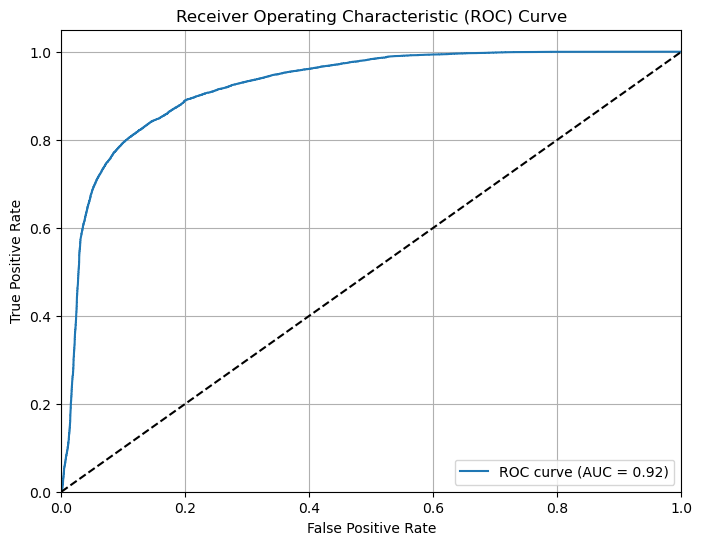

In [187]:
draw_roc_curve(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

#### Evaluate on the test set

In [188]:
X_test_logreg = X_test.copy()

In [189]:
X_test_logreg = X_test_logreg[log_cols]

In [190]:
X_test_sm = sm.add_constant(X_test_logreg)

In [191]:
y_test_pred = logreg_4.predict(X_test_sm)

In [192]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
75244,6.896937e-08
17521,3.885624e-01
54424,1.131604e-01
38885,3.780891e-01
55439,6.226660e-01


In [193]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
75244,0
17521,0
54424,0
38885,0
55439,0


In [194]:
y_test_df['cusID'] = y_test_df.index

In [195]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [196]:
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [197]:
y_test_pred_final.head()

,churn,cusID,0
0,0,75244,6.896937e-08
1,0,17521,3.885624e-01
2,0,54424,1.131604e-01
3,0,38885,3.780891e-01
4,0,55439,6.226660e-01


In [198]:
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [199]:
y_test_pred_final = y_test_pred_final[['cusID', 'churn', 'churn_prob']]

In [200]:
y_test_pred_final.head()

,cusID,churn,churn_prob
0,75244,0,6.896937e-08
1,17521,0,3.885624e-01
2,54424,0,1.131604e-01
3,38885,0,3.780891e-01
4,55439,0,6.226660e-01


In [201]:
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [202]:
y_test_pred_final.head()

,cusID,churn,churn_prob,test_predicted
0,75244,0,6.896937e-08,0
1,17521,0,3.885624e-01,0
2,54424,0,1.131604e-01,0
3,38885,0,3.780891e-01,0
4,55439,0,6.226660e-01,1


In [203]:
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[3942 1134]
 [  31  140]]


In [204]:
print("Accuracy:",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

print("Sensitivity:",TP / float(TP+FN))

print("Specificity:", TN / float(TN+FP))

Accuracy: 0.7779683628740233
Sensitivity: 0.9057106223493441
Specificity: 0.8376565736265904


**Model performance summary:**

- PCA Advantage: The model with PCA demonstrates a clear advantage in both training (87.17%) and test accuracy (83.38%) compared to the model without PCA (83.83% and 77.80%, respectively). This indicates that PCA effectively captured important information from the data, leading to a model that generalizes better to unseen data.


- Sensitivity and Specificity: Consistent sensitivity across both models and datasets is a positive sign. Specificity also remains consistent, suggesting both models perform well in this regard.

**Overall**:

Based on these results, PCA seems to be a beneficial step for this dataset. It helps the model achieve higher accuracy on both training and test data, suggesting better generalization. While the increase in test accuracy might not be massive (5.58%), it indicates that PCA helps the model learn underlying patterns more effectively.

**There are some predictors selected in the logistic regression model, most of them are inversly correlated with the churn probability:**
    
- roam_og_mou_8
- loc_og_t2f_mou_8
- std_og_t2m_mou_8
- isd_og_mou_8
- total_og_mou_8
- loc_ic_t2f_mou_8
- loc_ic_mou_8
- isd_ic_mou_8
- ic_others_8
- monthly_2g_8
- monthly_3g_8
- vbc_action_dec_flag

# Recommendation

**Insights:**

- Low Call Volume & Increasing Value-Based Cost: Customers with low call volume (local, ISD, outgoing others) in August and a rising value-based cost are prime targets for new offers. Consider personalized plans with lower fixed fees or bundles that cater to their specific needs.

- Decreased Usage & Roaming: Customers who show a decrease in overall usage (2G, 3G, STD incoming) in August, particularly those with a decline in fixed-line incoming calls (STD incoming to T fixed lines), are likely to churn. Additionally, customers with increasing roaming usage are also at risk. This suggests a need to address both declining core usage and potentially high roaming costs.

**Actionable Recommendations:**

- Review STD & ISD Rates: Analyze your STD and ISD rates to ensure they are competitive. Consider offering packages or discounts to incentivize customers who rely on these services.

- Develop Data-Driven Promotions: Leverage customer data to create targeted promotions. Offer plans with more data or minutes to address declining usage trends.

- Focus on Roaming: Review roaming charges and introduce attractive roaming packages to retain customers who frequently travel.

- Gather Customer Feedback: Actively collect customer query and complaint data to understand their pain points and tailor solutions accordingly.